Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 09: Filter Design/Compression

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 22, 2023**. If you need help (and Google and other resources were not enough), consult the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Exercise 0: Math recap (Covariance) [0 Points]

This exercise is intended to revise the notion of covariance, which will pop up in class soon. Check if you are comfortable with it. You don't need a deep understanding, but you should have got the basic ideas. If you have problems to answer these questions offhand, this is a good time to look terms up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What does *covariance* express? How can the covariance between two random variables be computed? What is the relation to *correlation*?

YOUR ANSWER HERE

**b)** What is the *covariance matrix*? What do the entries in this matrix represent? How is it computed?

YOUR ANSWER HERE

**c)** Create and plot two (1-dimensional) datasets with low covariance (use `plt.scatter`). Then do the same for two datasets with high covariance.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Filter design and frequency space (6 points)

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the the kernel size. What do you observe?

IndexError: index 50 is out of bounds for axis 0 with size 3

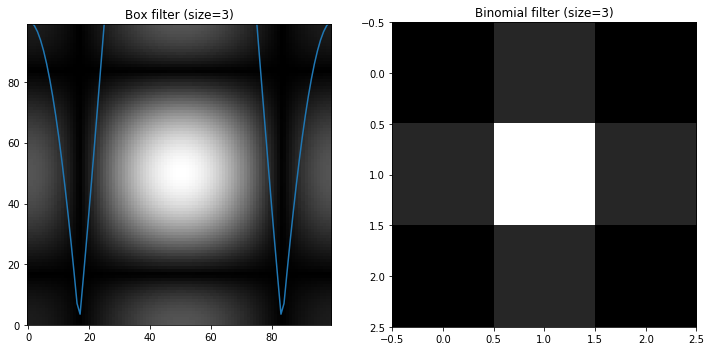

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 3 # vary this
image_size = 100

# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

# YOUR CODE HERE
for i in range(kernel_size) :
    for j in range(kernel_size) :
        box_kernel[i,j] = 1
box_kernel *= 1/kernel_size


ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
gauss = np.exp(-0.5 * np.square(ax))
binomial_kernel = np.outer(gauss, gauss)
binomial_kernel *= 1/np.sum(binomial_kernel)


box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

The kernel size is bigger, the higher frequencies' area is boarder. 

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_\max$. What do you observe? Explain that observation and discuss how to improve the result.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as imageio
from scipy import ndimage

f_max = 30
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    result = image
    low_pass_filter = np.zeros((image.shape[0],image.shape[1]))
    for u, v in np.ndindex(image.shape[0], image.shape[1]) :
        if (u * u + v * v <= f_max * f_max) :
            low_pass_filter[u, v] = 1
    result = np.fft.fft2(image)
    result = ndimage.convolve(result, low_pass_filter)
    result = np.fft.fftshift(result)
    return result

filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

TypeError: Complex type not supported

It may lead to ringing-artifact. The pixel of the image might be wavy.

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

I didn't get the exact kernel size for a Gaussian filter. But broad kernel has narrow spectrum.

**d)** Describe impulse ("salt and pepper") noise and explain what kind of filter should be used to remove such noise.

When image has small white or black dots, we call it salt and pepper noise. It is irregular and small so when images have the salt and pepper noise, it is hard to make the image smooth. The butterworth filter may help it to remove. Butterworth filter help the filtered image not have wave.

## Assignment 2: Sampling theorem (4 points)

**a)** Express the statement of the sampling theorem in your own words. Explain its relevance.

aim of sampling theory is to change continouse image into discrete image without losing or adding information (Aliasing). sampling theory is simply multiplying the continouse image with impulse train(delta function) which is called 'Shah Function'
fs(x) = f(x)*s(x). if we get the fourier transform of the continous function and convoluted with fourier transform of delta function the result will be copies of the fourier transform of the original signal.

**b)** Assume you are given a document printed on a 600 dpi (dots per inch) printer. If you want to scan this document, what resolution should you choose to avoid aliasing effects?

to avoid the aliasing effects we have to shift the copies of fourier transform so that they wouldn't overlap (increase 1/Δx) and we can do that by decreasing delta x or w Δx ≤ 1/(2w) so according to the previous equation x(pixels) = 600*2 = 1200 pixels 
(the pixels are the resolution)

**c)** What is aliasing? Explain the Moiré effect shown in the following cell.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
from IPython.display import display

def plotter(function, **kwargs):
    img = function(**kwargs)
    imshow.set_data(img)
    fig.canvas.draw()

def moire(exp):
    return np.sin(d**exp)

nx, ny = (600, 300)
x = np.linspace(0, nx*np.pi/ny, nx)
y = np.linspace(0, np.pi, ny)
xv, yv = np.meshgrid(x, y)
d = np.sqrt(xv**2+yv**2)

fig, ax = plt.subplots(figsize=(9,6))
imshow = plt.imshow(np.sin(d))
plt.gray()
interactive(plotter, function=fixed(moire), exp=(1,8,0.5))

aliasing is simply the losing of information (frequency) while applying the sampling theory or the addition of more information (frequencies) which aren't in the original image and aren't needed which is called (Artifacts), they are also the overlaping between the copies of the original fourier transform of the delta function, as the previous image the addition of unnecessary information (frequencies) cause the formation of moire.

**d)** Gaussian pyramid: motivate the construction process of a Gaussian pyramid with the sampling theorem.

the aim of the Gaussian pyramid is to apply reduce operation for image pixels, so it's converting the continouse signal into discrete signal, but first we have to filter the image by using low pass filtering to remove the high frequencies to avoid the artifacts while applying the sampling theorm. pixels *1/16 = new pixel, pixels are Δx.

## Assignment 3: Redundancy and compression (3 points)

**a)** Explain in your own words the different types of redundancy mentioned on (CV-10 slide 3). How can you check for each of these types of redundancy?

1. coding redundancy:
using more bits than necessary to code the gray values. we check that by calculating the probability of occurances of each gray value if it's low the we will simplified the code (less bits), by merging the least two likely symbols together into one node, we will continoue doing that until we have just two nodes with the highest frequency of occurance that's whtat we call 'Huffman coding'.
2. interpixel redundancy:
redundancy caused by the repetation of same gray or colored values of the neighbors pixels.we check that by checking the image line by line so if we found the neighbor pixels with same values we simplified it into the number and the value (number, value)
3. psychovisual redundancy:
expressing more information with more computational effort which are useless for my aim. we check that by comparing our data with our aim.


**b)** Explain the differences between lossless and lossy compression. Name examples for both of them. Sketch application scenarios.

1. lossless: 
a. decrease the size of the image (compression) without removing any information, so without affecting the quality of the image. b. the image can be restored to it's orignal form (the change isn't permenant).
c. no image distortion
d. the lossy reduce the size of the image more so we use lossless if we care more about the information and the quality of the image.
e. most common format is PNG
f. can be applied on medical images.

2. lossy:
a. decrease the size of the image (compression) by removing thr less critical information, which may cause the reduction of image quality.
b. repetation of it on the same image will cause image distorition
c. once the image change it can't turn back to it's original (permenant)
d. decrease the size of the image more than lossless so it is used when the storage is more important than the image quality
e. most common format is JPEG
f. internet applications as what's app and facebook messager


## Assignment 4: Entropy based compression (7 points)

**a)** Explain the idea of Huffman coding. What is the maximal compression factor that can be achieved for a given image? Load an image and compute that value (you may use `dolly.png` as an example. Make sure to load as 8-bit gray scale image).

There are redundant parts in the image and we want to make image compress with this redundant parts. Huffman coding helps it by coding redundancy. Imagine if an image has only two grayvalue. In this case, the image needs only two grayvalue out of 256 grayvalues. We will use 1 bit instead of 1 byte. Using this principle, we can sort the grayvalues according to probability that image has the value. The most common value will get the least bit for image compression. From the maximal compression factor we can guess how we can compress the image.

In [17]:
import numpy as np
import imageio as imageio
import matplotlib.pyplot as plt

img = imageio.imread('images/dolly.png', pilmode='L')
#img = plt.imread('images/dolly.png')

def entropy(img) :
    for g1, g2 in np.ndindex(img.shape) :
        en = np.sum(img[g1,g2] * np.log(img[g1,g2]))
    return en
        
numofbit = img.shape[0] * img.shape[1]
entropy = entropy(img)
print(numofbit / entropy)

480000


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


5962.732919254659


**b)** Now compute the relative frequencies (normalized histogram) of the image and generate an (approximately) balanced tree, as described in (CV-10 slide 6). *Hint:* you may use Python tuples as building blocks of a tree. Every non-leaf node is a pair `(left, right)` where `left` and `right` are the left and right subtrees, respectively (of course you are free to choose another approach if you prefer to do so).

In [18]:
from collections import namedtuple
from sortedcontainers import SortedList  # conda install -c conda-forge sortedcontainers

Node = namedtuple('Node', ['frequency', 'subtree'])

img = imageio.imread('images/dolly.png', pilmode='L')
# nodes is a sorted list of sub-trees, each annotated by its cummulative relative frequency,
# i.e. each list item is a pair (frequency, subtree)
# lowest frequencies come first
nodes = SortedList(
    [Node(frequency, i) for i, frequency in enumerate(normed_hist_img)],
    key=lambda x: x.frequency)


# YOUR CODE HERE
print(tree)

NameError: name 'normed_hist_img' is not defined

**c)** Now create a prefix free code from this tree, by traversing it following the idea sketched in (CV-10 slide 7). *Hint:* if you used the tuple representation recommended in (b), you can use `isinstance(node, tuple)` to check if `node` is an inner node or a leaf.

In [ ]:
# initialize a list of code values
codes = list(normed_hist_img)

# function to recursively traverse the tree.
# For every inner node assign prefix "0" to the left subtree
# and prefix "1" to the right subtree.
def assign_codes(codes, tree, prefix=''):
    # YOUR CODE HERE
    raise NotImplementedError()

assign_codes(codes, tree.subtree)
print(codes)

**d)** Compute the compression ratio that you can achieve with that code. Compare this with the maximal value computed in part (a). Explain your observation.

In [ ]:
acc = 0
for value, code in enumerate(codes):
    # YOUR CODE HERE
    raise NotImplementedError()

print("{:.2f} bits per pixel".format(acc))

YOUR ANSWER HERE